In [6]:
#import des fichiers et load des ressources
import functions
import pandas as pd
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

data = pd.read_csv('cleaned_data.csv')
pd.options.display.max_columns = data.shape[1]

In [7]:
#initialisation des valeurs explicatives et dépendantes
X = ['Ancienneté','NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)'] + list(
    data.filter(regex='^(LargestPropertyUseType_|Neighborhood_)').columns)
y = 'TotalGHGEmissions'
# Données d'entraînement et test
X_train, X_test, y_train, y_test = functions.train_test_split_data(data, X, y)

In [8]:
#standardisation
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

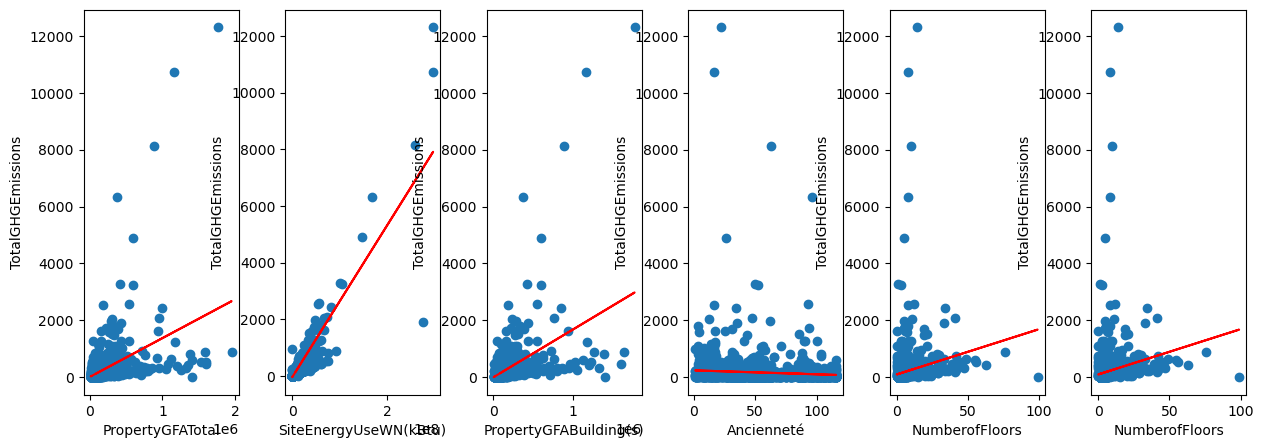

In [9]:
# quelques analyses bivariées
columns = ['PropertyGFATotal', 'SiteEnergyUseWN(kBtu)', 'PropertyGFABuilding(s)', 'Ancienneté', 'NumberofFloors','NumberofFloors']
fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))
for i, col in enumerate(columns):
    functions.showScatterPlot(data, col, y, ax=axes[i])
plt.subplots_adjust(wspace=0.3)
plt.show()

ValueError: num must be 1 <= num <= 12, not 13

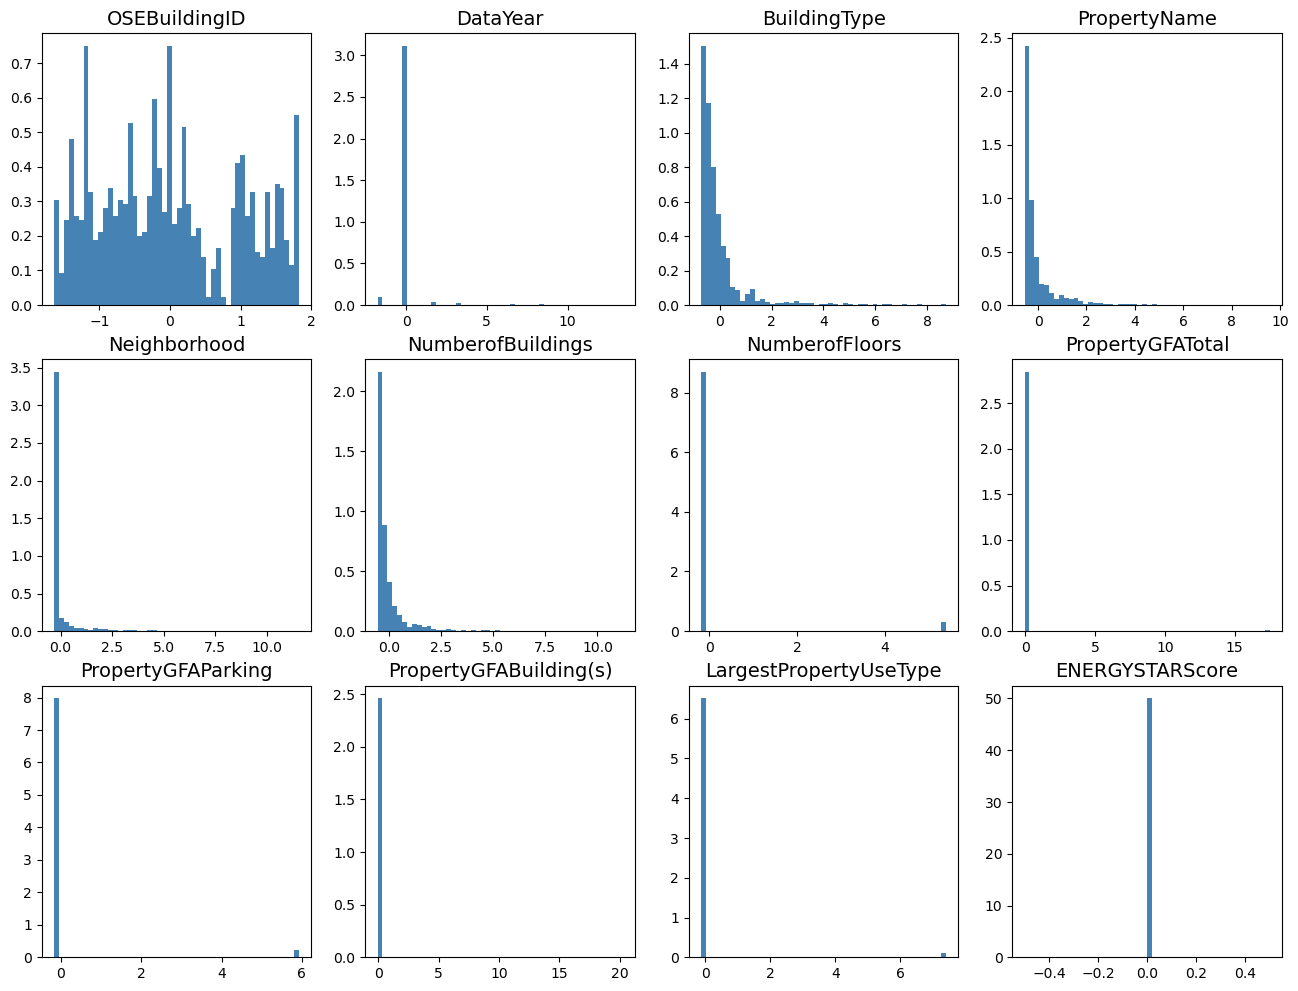

In [10]:
#distribution
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X_train_std.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X_train_std[:, feat_idx], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)


In [ ]:
#dummy_regressor
functions.dummy_regressor_model(data, X, y)

In [ ]:
models = [LinearRegression(),
          Lasso(),
          ElasticNet(),
          DecisionTreeRegressor(),
          Ridge(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          KNeighborsClassifier()]
#
# # Paramètres pour la recherche de grille
param_grids = [{'normalize': [True, False]},
               {'alpha': [0.1, 1, 10]},
               {'alpha': [0.1, 1, 10], 'l1_ratio': [0.25, 0.5, 0.75]},
               {'max_depth': [2, 5, 10]},
               {'alpha': [0.1, 1, 10]},
               {'n_estimators': [100, 500, 1000]},
               {'n_estimators': [100, 500, 1000], 'learning_rate': [0.01, 0.1, 1]},
               {'n_neighbors': [1, 3, 5, 7, 9]}]


In [ ]:
for model, param_grid in zip(models, param_grids):
    grid_search, results_df = functions.get_grid(model, X_train, y_train, param_grid)
    best_model, mse = functions.evaluate_model(grid_search.best_estimator_, X_train, X_test, y_train, y_test)
    print(type(model).__name__, "MSE:", mse)